#### **LSE Data Analytics Online Career Accelerator** 
#### Course 201: Data Analytics with Python

## Assignment 2: Covid data - Hazel Chan - April 30, 2022

## Student Note
This template can be used to better understand the suggested workflow and how to approach the questions. You are welcome to add code and markdown blocks to the various sections to add either code or comments. Make sure to add code cells as applicable, and to comment all your code blocks.

You have the option to populate your notebook with all the elements typically contained within the report, or to submit a separate report. In the case of submitting your notebook, you can embed images, links and text where appropriate in addition to the text notes added.

**SPECIAL NOTE**
- Submit your Jupyter Notebook with the following naming convention: `LSE_DA201_assignment_[your name]_[your surname]`
- You should submit a zipped folder containing all the elements used in your notebook (data files, images, etc)

> ***Markdown notes:*** Remember to change cell types to `Markdown` and take a look here: [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to add formatted text, links and images to your markdown documents.

### 0) Environment preparation
These settings are provided for you.

In [1]:
# Import the required libraries and set plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(15,10)})

Define directory to load raw data. You may change this directory to the one on your computer to load data files.

In [2]:
!pwd

/Users/hazel/Documents/LSE Data Analytics/Course 2 - Python/Assignment 2/Final


In [3]:
# Define directory to load data files
dir = '/Users/hazel/Documents/LSE Data Analytics/Course 2 - Python/Assignment 2/Final/Data'

### 1) Assignment activity 1: [Prepare your GitHub repository](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-1-prepare-your-github-repository?module_item_id=20647)

#### 1.1) Report/notebook expectations:
- Demonstrate your GitHub setup consisting of the load and push updates of all the Jupyter Notebook files. (**Hint**: Make sure that your github username, the directory structure and updates are visible in the screenshot. Make sure to provide a zipped copy of the folder containing your submission notebook as well as supporting files such as images used in the notebook.)

#### Required: Report submission:
Insert URL to your public GitHub repository and a screenshot (double click cell to edit)
- [My Github Repo](https://github.com/hazz292/LSE_DA_COVID_analysis_Hazel)
- Screenshot demo 

![My Github screenshot](https://github.com/hazz292/LSE_DA_COVID_analysis_Hazel/blob/main/github_screenshot.png?raw=true)

(Note that this only works if your repo is set to **public**. Alternatively you need to refer to a local image and include this image in your submission.)

#### 1.2) Presentation expectations:
- Describe the role and how workflow tools such as Github can be used to add value to organisations.

#### Optional for notebook/Required for presentation.
- You can use this cell as placeholder for bulletpoints to include in your presentation. 
- Note that this section will not be graded in the notebook, grades awarded based on presentation content only. 

(Double-click to edit)

#### My Notes:
* Github allows all changes in the files to be tracked and stored safely in the cloud.
* When making changes to the code, team members can create a copy of the files using a fork, then the changes they make will not affect the code in the main branch before approval.
* Then, team members can submit their changes for team lead to review and approve before merging with main branch of code.
* This will mitigate the risk of publishing incorrect code that will affect the project and provides an organisational system to store all files related to project which will lead to more efficent workflows and prevent accidental deletions or duplications.

### 2) Assignment activity 2: [Import and explore data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-2-import-and-explore-the-data?module_item_id=20648)

#### 2.1) Report expectations:
- Load the files `covid_19_uk_cases.csv` and `covid_19_uk_vaccinated.csv` and explore the data.
- Explore the data using the `info()`, `describe()`, `shape` and `value_counts()` methods, and note the observations regarding data types, number or records and features
- Identify missing data
- Filter/subset data
- Aggregate data (totals and by month)
- Note observations

### Load the covid cases and vaccine data sets as cov and vac respectively

In [4]:
# Show the files in a child directory
!ls Data/

covid_19_uk_cases.csv      tweets.csv
covid_19_uk_vaccinated.csv tweets_2.csv
global_data.csv


In [5]:
cov_uk = pd.read_csv(dir + '/covid_19_uk_cases.csv')
vac_uk = pd.read_csv(dir + '/covid_19_uk_vaccinated.csv')

print('Imported csv files successfully')

Imported csv files successfully


### Explore the DataFrames with the appropriate functions

#### 2.1 Covid Cases UK DataFrame

In [6]:
# view number of rows and columns
print('\nNumber of rows and column in dataframe:\n')
cov_uk.shape


Number of rows and column in dataframe:



(7584, 12)

In [7]:
# view information about dataframe
print('\nInformation about dataframe:\n')
cov_uk.info()


Information about dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Deaths                    7582 non-null   float64
 9   Cases                     7582 non-null   float64
 10  Recovered                 7582 non-null   float64
 11  Hospitalised              7582 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 711.1+ KB


**Observation:** 

Variables of Deaths, Cases, Recovered, Hospitalised should be converted into integer as a person cannot be represented by a decimal place. Date should be converted into DateTime datatype.

Key information needed for analysis to increase vaccination rate through marketing campaign:
* Province/State
* Sub-region Name
* Date
* Deaths
* Cases
* Recovered
* Hospitalised

In [8]:
# view first and last 5 rows of dataframe
cov_uk

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-10,137735.0,8154306.0,0.0,378.0
7580,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-11,137763.0,8193769.0,0.0,386.0
7581,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-12,137944.0,8231437.0,0.0,386.0
7582,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-13,138080.0,8272883.0,0.0,0.0


In [9]:
# view last 50 rows of one province to determine whether variables are cumulative.
cov_uk.loc[cov_uk['Province/State'] == 'Anguilla'].tail(50)

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
582,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2021-08-26,0.0,194.0,0.0,738.0
583,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2021-08-27,0.0,194.0,0.0,744.0
584,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2021-08-28,0.0,194.0,0.0,732.0
585,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2021-08-29,0.0,201.0,0.0,746.0
586,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2021-08-30,0.0,217.0,0.0,770.0
587,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2021-08-31,0.0,217.0,0.0,806.0
588,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2021-09-01,0.0,217.0,0.0,806.0
589,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2021-09-02,0.0,256.0,0.0,800.0
590,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2021-09-03,0.0,256.0,0.0,805.0
591,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2021-09-04,0.0,279.0,0.0,793.0


In [10]:
# view last 50 rows of one province to determine whether variables are cumulative.
cov_uk.loc[cov_uk['Province/State'] == 'Gibraltar'].tail(50)

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
4374,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-08-26,96.0,5314.0,0.0,879.0
4375,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-08-27,97.0,5323.0,0.0,885.0
4376,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-08-28,97.0,5332.0,0.0,872.0
4377,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-08-29,97.0,5338.0,0.0,888.0
4378,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-08-30,97.0,5342.0,0.0,917.0
4379,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-08-31,97.0,5354.0,0.0,959.0
4380,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-09-01,97.0,5367.0,0.0,960.0
4381,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-09-02,97.0,5371.0,0.0,952.0
4382,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-09-03,97.0,5376.0,0.0,958.0
4383,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-09-04,97.0,5386.0,0.0,944.0


**Observation:** Cases, deaths, recovered, hospitalised variables are cumulative.

In [11]:
# view count of unique values in each province/state in UK
cov_uk.value_counts(subset='Province/State', dropna=False)

Province/State
Anguilla                                        632
Bermuda                                         632
British Virgin Islands                          632
Cayman Islands                                  632
Channel Islands                                 632
Falkland Islands (Malvinas)                     632
Gibraltar                                       632
Isle of Man                                     632
Montserrat                                      632
Others                                          632
Saint Helena, Ascension and Tristan da Cunha    632
Turks and Caicos Islands                        632
dtype: int64

**Observation:** Number of counts are the same as it should be the number of days in the period of data collected from 22 January 2020 to 14 October 2021.

In [12]:
# view descriptive statistics of dataframe
cov_uk.describe().round(2)

,Lat,Long,Intermediate Region Code,Deaths,Cases,Recovered,Hospitalised
count,7584.00,7584.00,7584.00,7582.00,7582.00,7582.00,7582.00
mean,21.84,-41.44,12.50,6210.20,214708.15,454.69,685.23
std,28.31,30.53,14.01,24860.79,1007556.94,1010.64,819.26
min,-51.80,-81.25,0.00,0.00,0.00,0.00,0.00
25%,17.85,-64.67,0.00,0.00,12.00,0.00,105.00
50%,20.50,-60.86,2.50,1.00,168.50,13.00,390.00
75%,39.45,-5.15,29.00,25.00,1585.00,312.00,955.75
max,55.38,-2.36,29.00,138237.00,8317439.00,8322.00,4907.00


In [13]:
# view dataframe of a specific date
cov_uk[cov_uk['Date'] == '2021-10-14'].sort_values(by='Cases',ascending=False)

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
7583,Others,United Kingdom,55.378100,-3.436000,GBR,Northern Europe,0,2021-10-14,138237.0,8317439.0,0.0,0.0
3159,Channel Islands,United Kingdom,49.372300,-2.364400,Others,Northern Europe,0,2021-10-14,100.0,12135.0,0.0,0.0
5055,Isle of Man,United Kingdom,54.236100,-4.548100,IMN,Northern Europe,0,2021-10-14,54.0,8343.0,0.0,0.0
4423,Gibraltar,United Kingdom,36.140800,-5.353600,GIB,Southern Europe,0,2021-10-14,97.0,5727.0,0.0,0.0
1263,Bermuda,United Kingdom,32.307800,-64.750500,BMU,Northern America,0,2021-10-14,95.0,5548.0,0.0,0.0
6951,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,TCA,Latin America and the Caribbean,29,2021-10-14,23.0,2910.0,0.0,0.0
1895,British Virgin Islands,United Kingdom,18.420700,-64.640000,VGB,Latin America and the Caribbean,29,2021-10-14,37.0,2725.0,0.0,0.0
2527,Cayman Islands,United Kingdom,19.313300,-81.254600,CYM,Latin America and the Caribbean,29,2021-10-14,2.0,1011.0,0.0,0.0
631,Anguilla,United Kingdom,18.220600,-63.068600,AIA,Latin America and the Caribbean,29,2021-10-14,1.0,644.0,0.0,0.0
3791,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,FLK,Latin America and the Caribbean,5,2021-10-14,0.0,69.0,0.0,0.0


In [14]:
# total number of cases in UK for each day
group = cov_uk.groupby(['Date','Province/State'])[['Cases','Recovered']].sum()

**Observation:** Need to calculate actual number of cases reported on each day and not cumulative or else unable to identify trend of rise/fall in peaks.

##### Handle missing data

In [15]:
# determine the number of missing values
cov_uk[cov_uk.isna().any(axis=1)]

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
875,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-21,NaN,NaN,NaN,NaN
876,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-22,NaN,NaN,NaN,NaN


In [16]:
# number of missing values in each column
print('\nNumber of rows with missing data in each column: \n')
print(cov_uk.isna().sum().sort_values(ascending=False))


Number of rows with missing data in each column: 

Deaths                      2
Cases                       2
Recovered                   2
Hospitalised                2
Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
dtype: int64


**Observations:** In UK cases data set, there are 2 rows in 12 columns which has missing values

In [17]:
# replace missing values with zero
cov_uk.fillna(0,inplace=True)

# check if all missing values are replaced with zero
cov_uk.isna().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      0
Cases                       0
Recovered                   0
Hospitalised                0
dtype: int64

In [18]:
# get column names
cov_uk.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Date', 'Deaths', 'Cases', 'Recovered',
       'Hospitalised'],
      dtype='object')

In [19]:
# convert date column data type to DateTime
cov_uk['Date'] = pd.to_datetime(cov_uk['Date'])
cov_uk.dtypes

Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Deaths                             float64
Cases                              float64
Recovered                          float64
Hospitalised                       float64
dtype: object

In [20]:
# add column with year_month
cov_uk['Year_Month'] = cov_uk['Date'].dt.to_period('M')
cov_uk['Year_Month']

0       2020-01
1       2020-01
2       2020-01
3       2020-01
4       2020-01
         ...   
7579    2021-10
7580    2021-10
7581    2021-10
7582    2021-10
7583    2021-10
Name: Year_Month, Length: 7584, dtype: period[M]

In [21]:
# change deaths, cases, recovered, hospitalised to integer
# convert datatype to integer
cov_uk['Deaths'] = cov_uk['Deaths'].astype('int64')
cov_uk['Cases'] = cov_uk['Cases'].astype('int64')
cov_uk['Recovered'] = cov_uk['Recovered'].astype('int64')
cov_uk['Hospitalised'] = cov_uk['Hospitalised'].astype('int64')

cov_uk.dtypes

Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Deaths                               int64
Cases                                int64
Recovered                            int64
Hospitalised                         int64
Year_Month                       period[M]
dtype: object

In [22]:
# subset covid cases dataframe
cov_uk_clean = cov_uk[['Province/State', 'Country/Region',
       'Date', 'Year_Month', 'Deaths', 'Cases', 'Recovered',
       'Hospitalised']]

# view subset
cov_uk_clean

,Province/State,Country/Region,Date,Year_Month,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,2020-01-22,2020-01,0,0,0,0
1,Anguilla,United Kingdom,2020-01-23,2020-01,0,0,0,0
2,Anguilla,United Kingdom,2020-01-24,2020-01,0,0,0,0
3,Anguilla,United Kingdom,2020-01-25,2020-01,0,0,0,0
4,Anguilla,United Kingdom,2020-01-26,2020-01,0,0,0,0
...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,2021-10-10,2021-10,137735,8154306,0,378
7580,Others,United Kingdom,2021-10-11,2021-10,137763,8193769,0,386
7581,Others,United Kingdom,2021-10-12,2021-10,137944,8231437,0,386
7582,Others,United Kingdom,2021-10-13,2021-10,138080,8272883,0,0


In [23]:
# view datatype
cov_uk_clean.dtypes

Province/State            object
Country/Region            object
Date              datetime64[ns]
Year_Month             period[M]
Deaths                     int64
Cases                      int64
Recovered                  int64
Hospitalised               int64
dtype: object

#### 2.2 Covid Vaccination UK DataFrame

In [24]:
# view number of rows and columns
print('\nNumber of rows and column in dataframe:\n')
vac_uk.shape


Number of rows and column in dataframe:



(7584, 11)

In [25]:
# view information about dataframe
print('Information about dataframe:\n')
vac_uk.info()

Information about dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Vaccinated                7584 non-null   int64  
 9   First Dose                7584 non-null   int64  
 10  Second Dose               7584 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 651.9+ KB


**Observation:** 

Key information needed for analysis to increase vaccination rate through marketing campaign:
* Province/State
* Sub-region Name
* Date
* Vaccinated
* First Dose
* Second Dose

In [26]:
# view first and last 5 rows of dataframe
vac_uk.loc[vac_uk['Province/State'] == 'Others'].tail(5)

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
7579,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-10,1070,1216,1070
7580,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-11,1300,1604,1300
7581,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-12,1482,2027,1482
7582,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-13,0,0,0
7583,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-14,0,0,0


**Observation**: These variables are not cumulative. Need to plot and explore behaviour over time to confirm.

In [27]:
# view descriptive statistics of dataframe
vac_uk.describe().round(2)

,Lat,Long,Intermediate Region Code,Vaccinated,First Dose,Second Dose
count,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00
mean,21.84,-41.44,12.50,5913.55,6192.82,5913.55
std,28.31,30.53,14.01,10846.41,11439.88,10846.41
min,-51.80,-81.25,0.00,0.00,0.00,0.00
25%,17.85,-64.67,0.00,0.00,0.00,0.00
50%,20.50,-60.86,2.50,0.00,0.00,0.00
75%,39.45,-5.15,29.00,8338.00,7505.50,8338.00
max,55.38,-2.36,29.00,69619.00,94038.00,69619.00


In [28]:
# view count of unique values in each province/state in UK
vac_uk.value_counts(subset='Province/State', dropna=False)

Province/State
Anguilla                                        632
Bermuda                                         632
British Virgin Islands                          632
Cayman Islands                                  632
Channel Islands                                 632
Falkland Islands (Malvinas)                     632
Gibraltar                                       632
Isle of Man                                     632
Montserrat                                      632
Others                                          632
Saint Helena, Ascension and Tristan da Cunha    632
Turks and Caicos Islands                        632
dtype: int64

In [29]:
# determine number of province
print(len(vac_uk['Province/State'].unique()))

# view count of unique values in each province/state in UK
vac_uk['Province/State'].unique()

12


array(['Anguilla', 'Bermuda', 'British Virgin Islands', 'Cayman Islands',
       'Channel Islands', 'Falkland Islands (Malvinas)', 'Gibraltar',
       'Isle of Man', 'Montserrat',
       'Saint Helena, Ascension and Tristan da Cunha',
       'Turks and Caicos Islands', 'Others'], dtype=object)

##### Handle missing data

In [30]:
# number of missing values in each column
print('\nNumber of rows with missing data in each column: \n')
print(vac_uk.isna().sum().sort_values(ascending=False))


Number of rows with missing data in each column: 

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64


**Observations:** In UK vaccination data set, there are no missing values.

In [31]:
# convert date column data type to DateTime
vac_uk['Date'] = pd.to_datetime(vac_uk['Date'])
vac_uk.dtypes

Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Vaccinated                           int64
First Dose                           int64
Second Dose                          int64
dtype: object

In [32]:
# add column with year_month
vac_uk['Year_Month'] = vac_uk['Date'].dt.to_period('M')
vac_uk['Year_Month']

0       2020-01
1       2020-01
2       2020-01
3       2020-01
4       2020-01
         ...   
7579    2021-10
7580    2021-10
7581    2021-10
7582    2021-10
7583    2021-10
Name: Year_Month, Length: 7584, dtype: period[M]

In [33]:
# view column names
vac_uk.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Date', 'Vaccinated', 'First Dose',
       'Second Dose', 'Year_Month'],
      dtype='object')

In [34]:
# subset covid vaccination dataframe
vac_uk_clean = vac_uk[['Province/State','Date', 'Year_Month',
                 'Vaccinated', 'First Dose','Second Dose']]

# view subset
vac_uk_clean

,Province/State,Date,Year_Month,Vaccinated,First Dose,Second Dose
0,Anguilla,2020-01-22,2020-01,0,0,0
1,Anguilla,2020-01-23,2020-01,0,0,0
2,Anguilla,2020-01-24,2020-01,0,0,0
3,Anguilla,2020-01-25,2020-01,0,0,0
4,Anguilla,2020-01-26,2020-01,0,0,0
...,...,...,...,...,...,...
7579,Others,2021-10-10,2021-10,1070,1216,1070
7580,Others,2021-10-11,2021-10,1300,1604,1300
7581,Others,2021-10-12,2021-10,1482,2027,1482
7582,Others,2021-10-13,2021-10,0,0,0


In [35]:
# view data types
vac_uk_clean.dtypes

Province/State            object
Date              datetime64[ns]
Year_Month             period[M]
Vaccinated                 int64
First Dose                 int64
Second Dose                int64
dtype: object

**Observations:**
There are 12 provinces in the UK and the data provided contains information about number of cases and vaccination for each day. Some variables seems to be cumulative and some is not. Therefore, this needs to be further explored by plotting graphs. 


Use **cov_uk_clean** and **vac_uk_clean** dataframes to continue exploration.

#### 1. Gibraltar Covid Cases

In [36]:
# Create DataFrame based on Gibraltar data
# Hint: newdf = df[df[col]==index]

In [37]:
# Create covid cases DataFrame of Gibraltar
cov_gibraltar = cov_uk_clean[cov_uk_clean['Province/State'] == 'Gibraltar']

print('\nNumber of rows and columns:\n')
cov_gibraltar.shape


Number of rows and columns:



(632, 8)

In [38]:
# view descriptive statistics
cov_gibraltar.describe().round(2)

,Deaths,Cases,Recovered,Hospitalised
count,632.00,632.00,632.00,632.00
mean,40.21,2237.11,1512.82,1027.62
std,45.33,2136.27,1817.10,1145.68
min,0.00,0.00,0.00,0.00
25%,0.00,177.00,109.50,157.75
50%,5.00,1036.50,323.50,675.50
75%,94.00,4286.00,4122.50,1548.00
max,97.00,5727.00,4670.00,4907.00


In [39]:
# print the whole DataFrame
# replace df with the name you have given your DataFrame
#pd.set_option("display.max_rows", None)

#df 

In [40]:
# view first and last 5 rows of dataframe
cov_gibraltar

,Province/State,Country/Region,Date,Year_Month,Deaths,Cases,Recovered,Hospitalised
3792,Gibraltar,United Kingdom,2020-01-22,2020-01,0,0,0,0
3793,Gibraltar,United Kingdom,2020-01-23,2020-01,0,0,0,0
3794,Gibraltar,United Kingdom,2020-01-24,2020-01,0,0,0,0
3795,Gibraltar,United Kingdom,2020-01-25,2020-01,0,0,0,0
3796,Gibraltar,United Kingdom,2020-01-26,2020-01,0,0,0,0
...,...,...,...,...,...,...,...,...
4419,Gibraltar,United Kingdom,2021-10-10,2021-10,97,5626,0,858
4420,Gibraltar,United Kingdom,2021-10-11,2021-10,97,5655,0,876
4421,Gibraltar,United Kingdom,2021-10-12,2021-10,97,5682,0,876
4422,Gibraltar,United Kingdom,2021-10-13,2021-10,97,5707,0,0


In [41]:
# Explore behaviour over time

<AxesSubplot:xlabel='Date'>

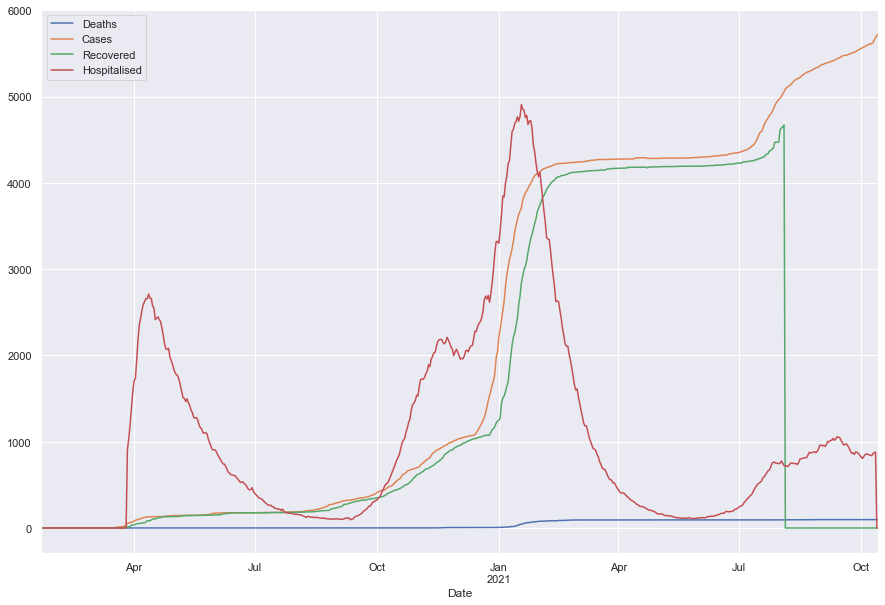

In [42]:
# gibraltar line plot to explore type of data
cov_gibraltar.plot('Date')

<AxesSubplot:xlabel='Date'>

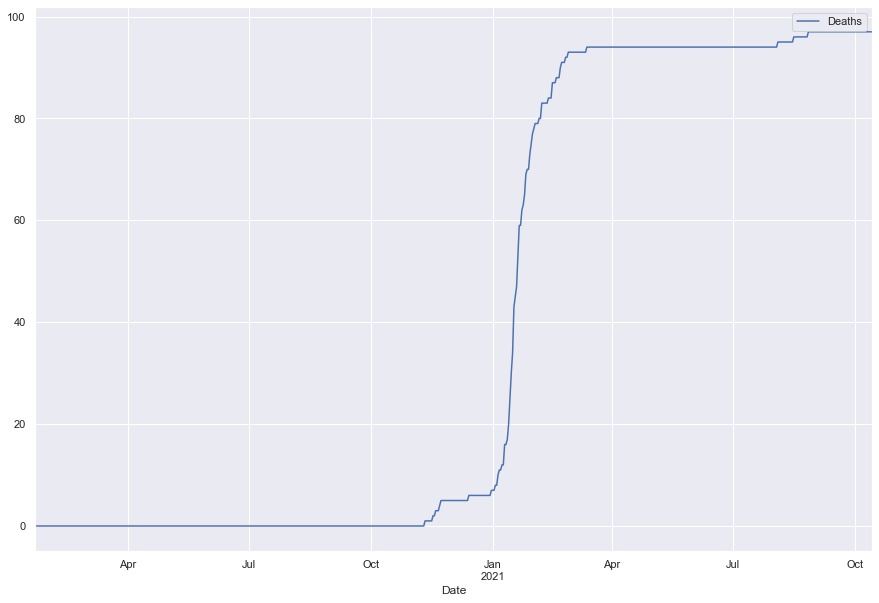

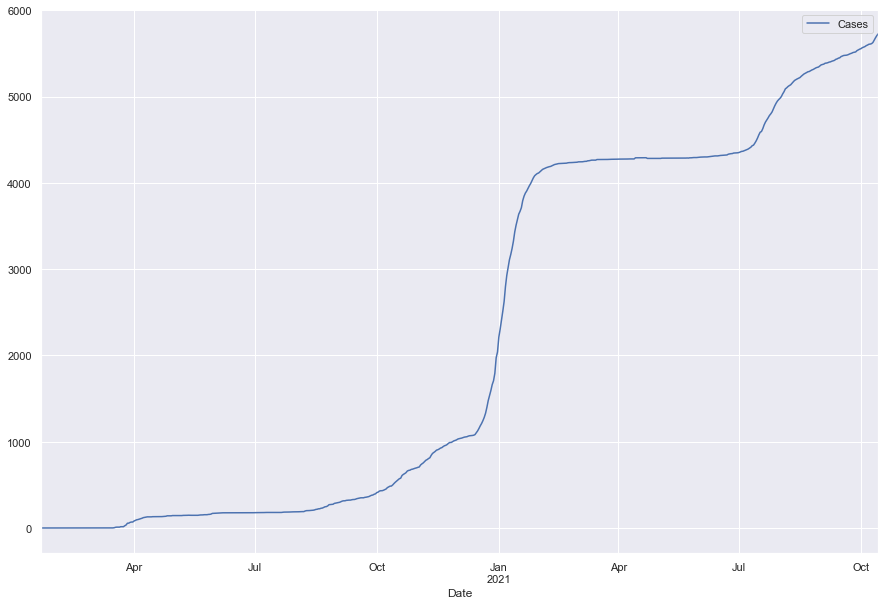

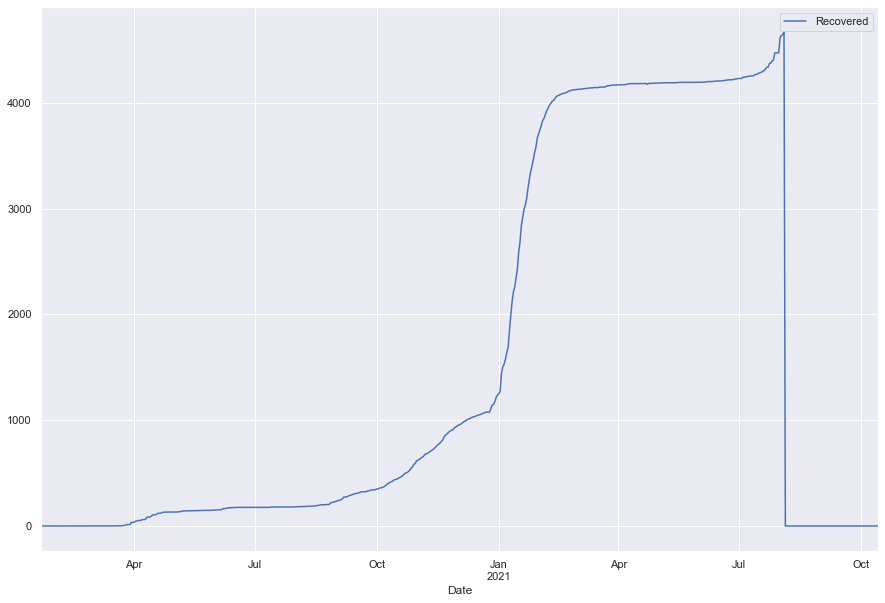

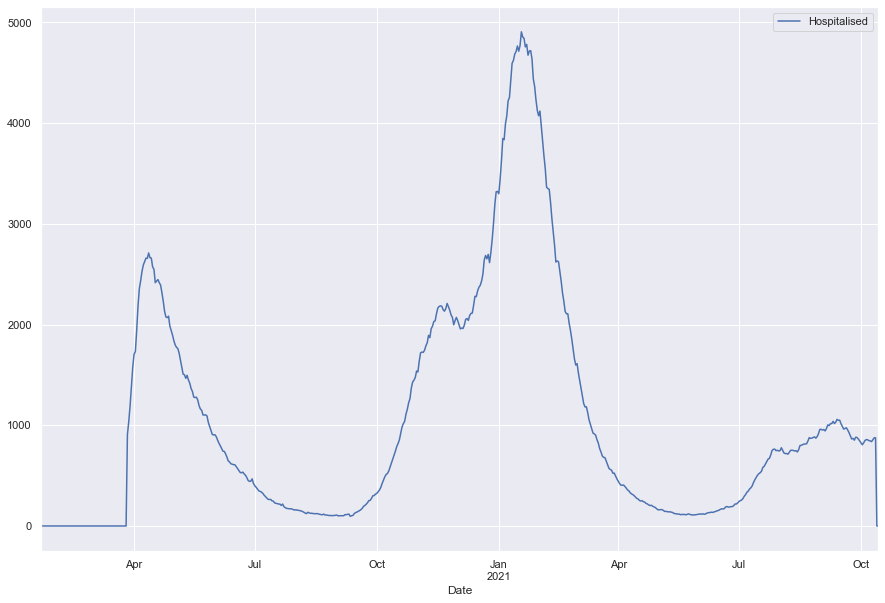

In [43]:
# Plot a line chart
cov_gibraltar.plot('Date', 'Deaths', label='Deaths')
cov_gibraltar.plot('Date', 'Cases', label='Cases')
cov_gibraltar.plot('Date', 'Recovered', label='Recovered')
cov_gibraltar.plot('Date', 'Hospitalised', label='Hospitalised')

In [44]:
# find which date recovered data begins missing
cov_gibraltar.sort_values(by='Recovered',ascending=True).head(10)

,Province/State,Country/Region,Date,Year_Month,Deaths,Cases,Recovered,Hospitalised
3792,Gibraltar,United Kingdom,2020-01-22,2020-01,0,0,0,0
4372,Gibraltar,United Kingdom,2021-08-24,2021-08,96,5299,0,870
4373,Gibraltar,United Kingdom,2021-08-25,2021-08,96,5308,0,873
4374,Gibraltar,United Kingdom,2021-08-26,2021-08,96,5314,0,879
4375,Gibraltar,United Kingdom,2021-08-27,2021-08,97,5323,0,885
4376,Gibraltar,United Kingdom,2021-08-28,2021-08,97,5332,0,872
4377,Gibraltar,United Kingdom,2021-08-29,2021-08,97,5338,0,888
4371,Gibraltar,United Kingdom,2021-08-23,2021-08,96,5290,0,877
4378,Gibraltar,United Kingdom,2021-08-30,2021-08,97,5342,0,917
4380,Gibraltar,United Kingdom,2021-09-01,2021-09,97,5367,0,960


In [45]:
# find which date recovered data begins missing
cov_gibraltar.tail(10)

,Province/State,Country/Region,Date,Year_Month,Deaths,Cases,Recovered,Hospitalised
4414,Gibraltar,United Kingdom,2021-10-05,2021-10,97,5590,0,858
4415,Gibraltar,United Kingdom,2021-10-06,2021-10,97,5597,0,856
4416,Gibraltar,United Kingdom,2021-10-07,2021-10,97,5606,0,848
4417,Gibraltar,United Kingdom,2021-10-08,2021-10,97,5608,0,845
4418,Gibraltar,United Kingdom,2021-10-09,2021-10,97,5613,0,838
4419,Gibraltar,United Kingdom,2021-10-10,2021-10,97,5626,0,858
4420,Gibraltar,United Kingdom,2021-10-11,2021-10,97,5655,0,876
4421,Gibraltar,United Kingdom,2021-10-12,2021-10,97,5682,0,876
4422,Gibraltar,United Kingdom,2021-10-13,2021-10,97,5707,0,0
4423,Gibraltar,United Kingdom,2021-10-14,2021-10,97,5727,0,0


**Observations:**

* Deaths = cumulative
* Cases = cumulative
* Recovered = cumulative but data is missing beginning on 2021-08-24 until 2021-10-14
* Hospitalised = daily but last two rows of data are missing on 2021-10-13 and 2021-10-14

#### 2. Gibraltar Covid Vaccination

In [46]:
# Create DataFrame based on Gibraltar data
# Hint: newdf = df[df[col]==index]

In [47]:
# Create covid cases DataFrame of Gibraltar
vac_gibraltar = vac_uk_clean[vac_uk_clean['Province/State'] == 'Gibraltar']

print('\nNumber of rows and columns:\n')
vac_gibraltar.shape


Number of rows and columns:



(632, 6)

In [48]:
# view descriptive statistics
vac_gibraltar.describe().round(2)

,Vaccinated,First Dose,Second Dose
count,632.00,632.00,632.00
mean,8870.32,9289.22,8870.32
std,15439.49,16287.23,15439.49
min,0.00,0.00,0.00
25%,0.00,0.00,0.00
50%,0.00,0.00,0.00
75%,14594.00,12488.75,14594.00
max,69619.00,94038.00,69619.00


In [49]:
# view dataframe
vac_gibraltar

,Province/State,Date,Year_Month,Vaccinated,First Dose,Second Dose
3792,Gibraltar,2020-01-22,2020-01,0,0,0
3793,Gibraltar,2020-01-23,2020-01,0,0,0
3794,Gibraltar,2020-01-24,2020-01,0,0,0
3795,Gibraltar,2020-01-25,2020-01,0,0,0
3796,Gibraltar,2020-01-26,2020-01,0,0,0
...,...,...,...,...,...,...
4419,Gibraltar,2021-10-10,2021-10,2431,2763,2431
4420,Gibraltar,2021-10-11,2021-10,2954,3646,2954
4421,Gibraltar,2021-10-12,2021-10,3368,4606,3368
4422,Gibraltar,2021-10-13,2021-10,0,0,0


<AxesSubplot:xlabel='Date'>

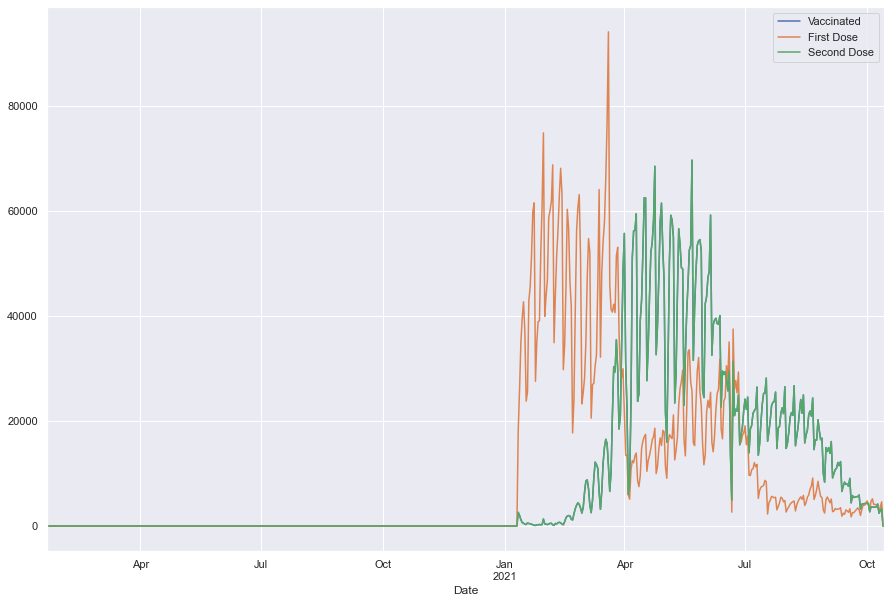

In [50]:
# gibraltar line plot to explore type of data
vac_gibraltar.plot('Date')

<AxesSubplot:xlabel='Date'>

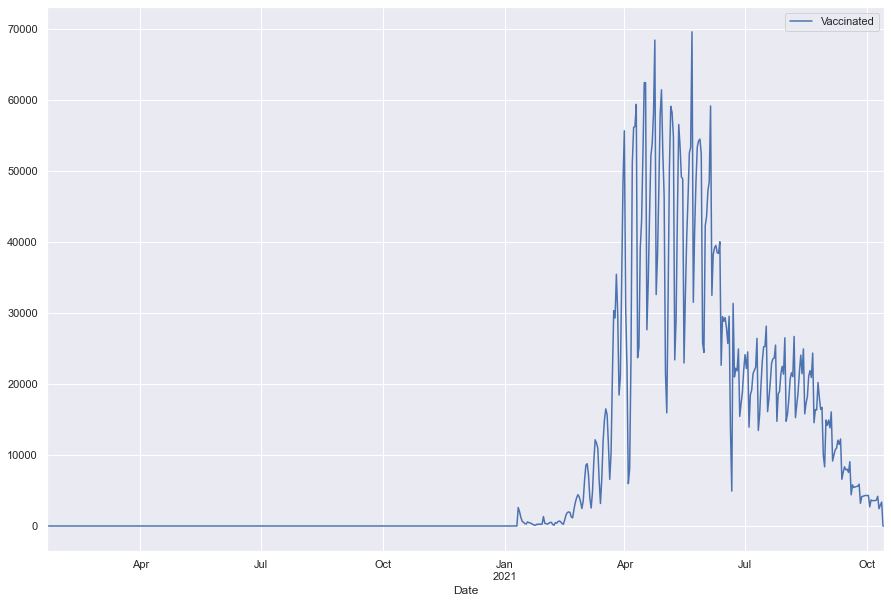

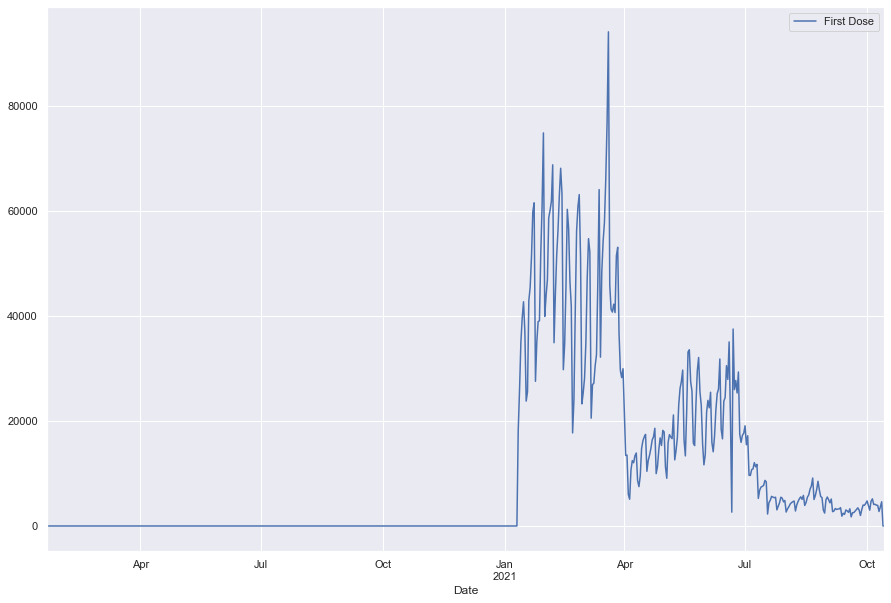

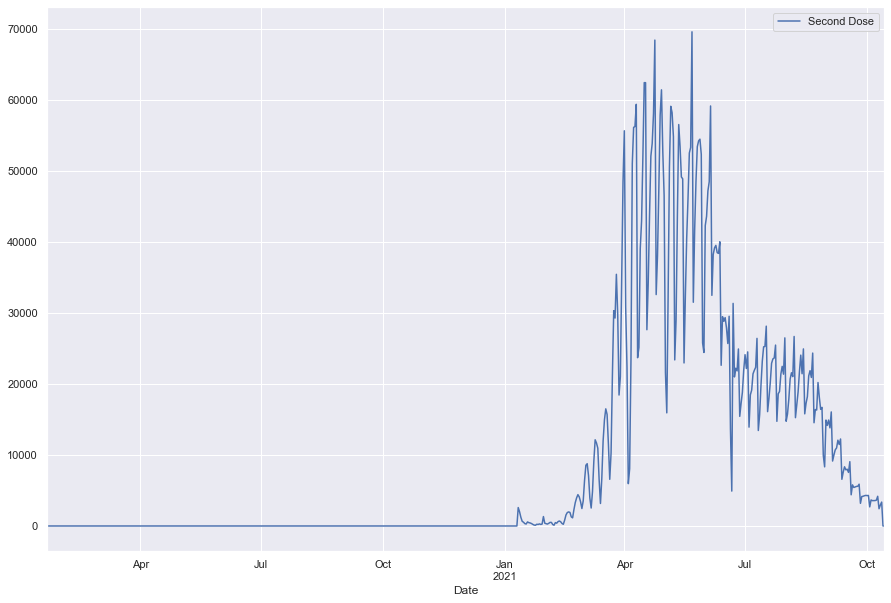

In [51]:
# Plot a line chart for each variable
vac_gibraltar.plot('Date', 'Vaccinated', label='Vaccinated')
vac_gibraltar.plot('Date', 'First Dose', label='First Dose')
vac_gibraltar.plot('Date', 'Second Dose', label='Second Dose')

**Observation:** Vaccination variables are daily numbers. According to the graphs above, the general trend of vaccination numbers decreased after reaching peak in june/july. 

* Vaccinated decreased after reaching peak because people may have started taking boosters, therefore no longer qualify as the definition of 'vaccinated' which is receiving two doses.
* First dose 
and second dose number decrease overtime because majority of the population may have already received first or second dose.  

In [52]:
# Determine number of people who are vaccinated, have received the first dose and have received the second dose
vac_gibraltar.groupby(by='Province/State')[['Vaccinated','First Dose','Second Dose']].sum()

,Vaccinated,First Dose,Second Dose
Province/State,,,
Gibraltar,5606041,5870786,5606041


In [53]:
# Explore and note observations
# Are there any of the visualisations that could be added here to make it easier?

Histgram can be used to make it easier to understand the distribution of data. Then, scatterplot can be used to explore relationship between two variables such as does increased vaccination number lead to lower number of cases. However, the cov_uk_clean dataframe must be recalculated to identify the daily number of cases, deaths. Since hospitalised and recovered variables have missing data, these two variables will be omited to focus on the purpose of this analysis which is to identify the target province to increase number of vaccination for the government's marketing campaign.

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Deaths'}>],
       [<AxesSubplot:title={'center':'Cases'}>,
        <AxesSubplot:title={'center':'Recovered'}>],
       [<AxesSubplot:title={'center':'Hospitalised'}>, <AxesSubplot:>]],
      dtype=object)

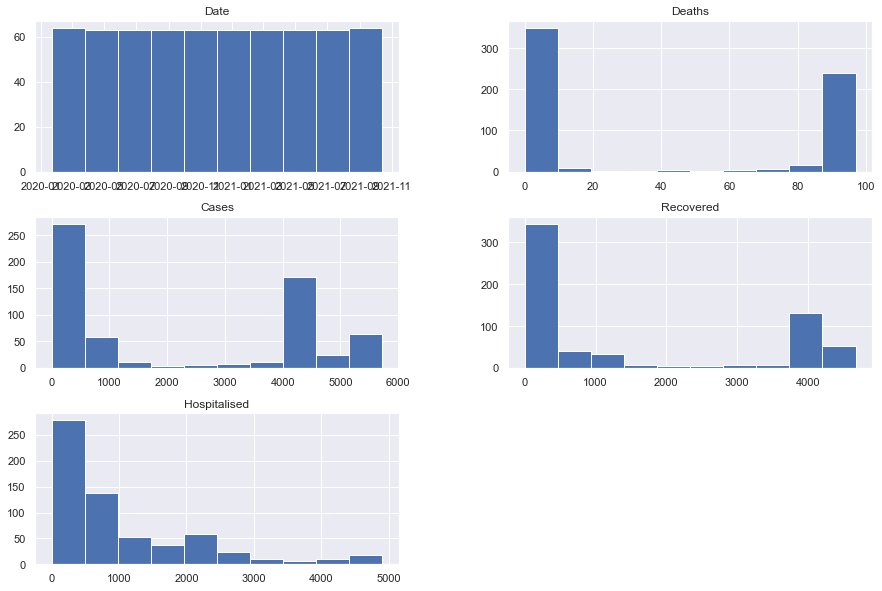

In [54]:
# histogram of province for cases dataframe
cov_gibraltar.hist()

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Vaccinated'}>],
       [<AxesSubplot:title={'center':'First Dose'}>,
        <AxesSubplot:title={'center':'Second Dose'}>]], dtype=object)

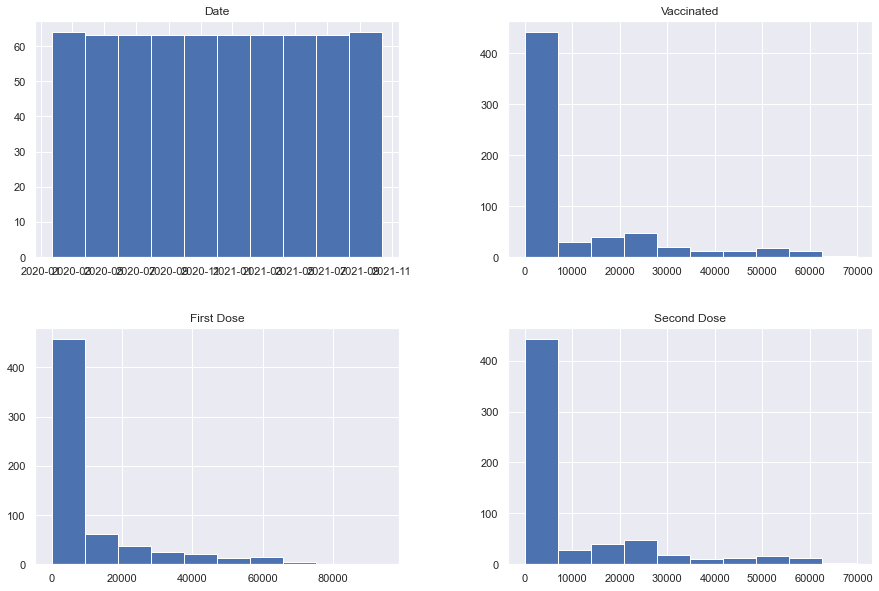

In [55]:
# histogram of province for vaccination dataframe
vac_gibraltar.hist()

In [56]:
# Aggregate data total by province and by month

In [57]:
# Total number for each province (omitted recovered and hospitalised as partial data is missing)
# max() is used because data is cumulative
cov_uk_province = cov_uk_clean.groupby('Province/State')[['Deaths','Cases']].max()
cov_uk_province.sort_values(by='Cases',ascending=False)

,Deaths,Cases
Province/State,,
Others,138237,8317439
Channel Islands,100,12135
Isle of Man,54,8343
Gibraltar,97,5727
Bermuda,95,5548
Turks and Caicos Islands,23,2910
British Virgin Islands,37,2725
Cayman Islands,2,1011
Anguilla,1,644


<AxesSubplot:xlabel='Province/State'>

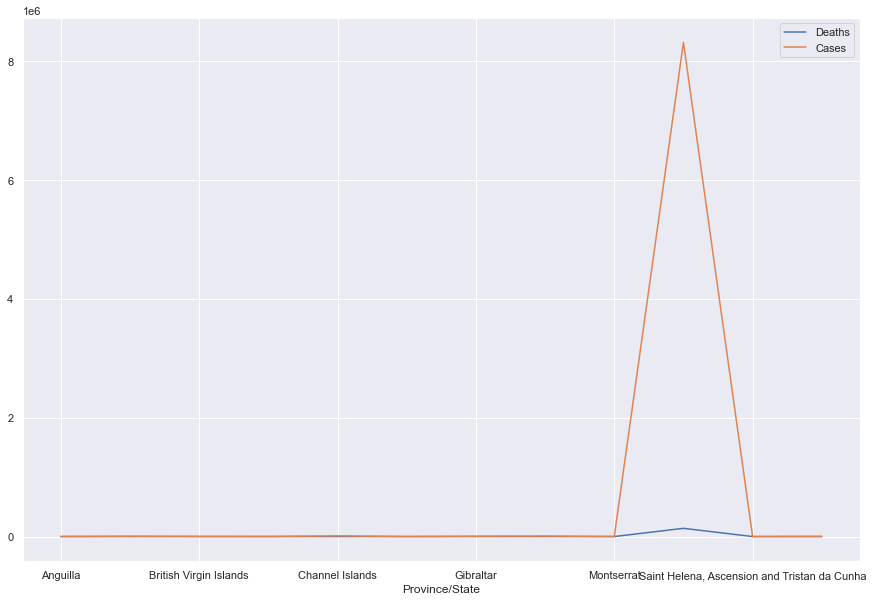

In [58]:
cov_uk_province.plot()

**Observations:** Others is has a significantly higher amount of cases because it the mainland of the United Kingdom including England, Wales and Scotland. Whereas, the rest of the provinces are islands that are part of the British Overseas Territories.

In [59]:
# Total number of cases by month
# max() is used because data is cumulative
cov_uk_month = cov_uk_clean.groupby('Year_Month')[['Deaths','Cases']].max()
cov_uk_month

,Deaths,Cases
Year_Month,,
2020-01,0,2
2020-02,0,61
2020-03,2453,38484
2020-04,26683,177543
2020-05,37445,256145
2020-06,40394,283710
2020-07,41189,303181
2020-08,41501,335873
2020-09,42143,453264


Covid Cases by Month


<AxesSubplot:xlabel='Year_Month'>

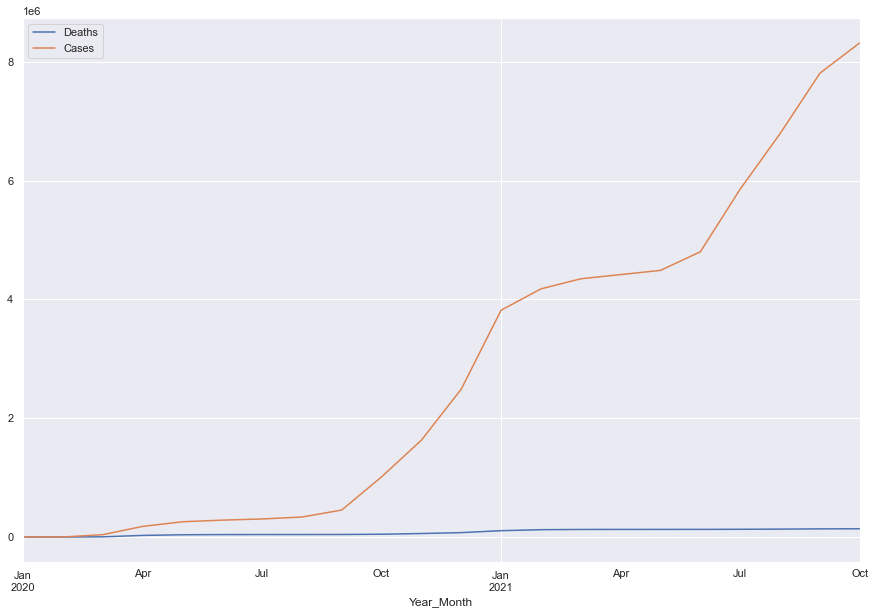

In [60]:
print('Covid Cases by Month')
cov_uk_month.plot()

In [61]:
vac_uk_clean.columns

Index(['Province/State', 'Date', 'Year_Month', 'Vaccinated', 'First Dose',
       'Second Dose'],
      dtype='object')

In [62]:
# Total number of vaccination for each province 
# sum() is used because data is daily
vac_uk_province = vac_uk_clean.groupby('Province/State')[['Vaccinated', 'First Dose', 'Second Dose']].sum().round()\
.sort_values(by='Vaccinated',ascending=False)
vac_uk_province

,Vaccinated,First Dose,Second Dose
Province/State,,,
Gibraltar,5606041,5870786,5606041
Montserrat,5157560,5401128,5157560
British Virgin Islands,4933315,5166303,4933315
Anguilla,4709072,4931470,4709072
Isle of Man,4036345,4226984,4036345
Falkland Islands (Malvinas),3587869,3757307,3587869
Cayman Islands,3363624,3522476,3363624
Channel Islands,3139385,3287646,3139385
Turks and Caicos Islands,2915136,3052822,2915136


<AxesSubplot:xlabel='Province/State'>

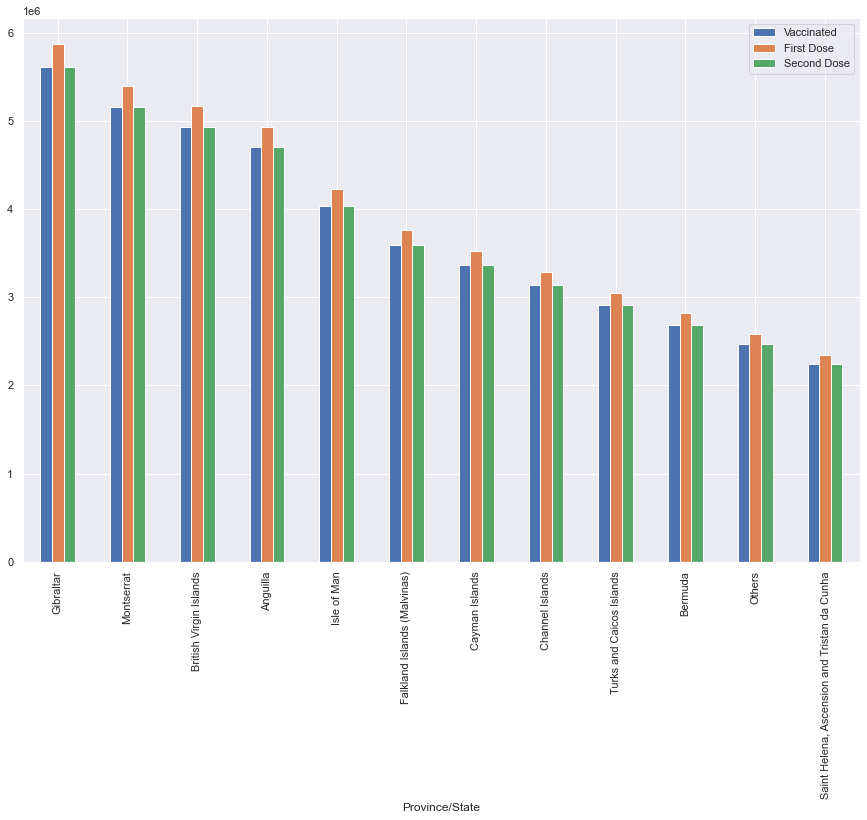

In [63]:
vac_uk_province.plot.bar()

**Observations:** Gibraltar is the province with the highest number of vaccination and Saint Helena, Ascension and Tristan da Cunha has the lowest number of vaccination. However, there is no data of the population therefore, unable to determine the ratio of vaccinated over total population, ie. percentage of population vaccinated to compare on the same bases as smaller island may have smaller population. To provide valuable insight for the government to increase number of fully vaccinated individuals, the ratio of those eligible for second dose should be identified.

In [64]:
# Total number by month
vac_uk_month = vac_uk_clean.groupby('Year_Month')[['Vaccinated', 'First Dose', 'Second Dose']].sum()
vac_uk_month

,Vaccinated,First Dose,Second Dose
Year_Month,,,
2020-01,0,0,0
2020-02,0,0,0
2020-03,0,0,0
2020-04,0,0,0
2020-05,0,0,0
2020-06,0,0,0
2020-07,0,0,0
2020-08,0,0,0
2020-09,0,0,0


<AxesSubplot:xlabel='Year_Month'>

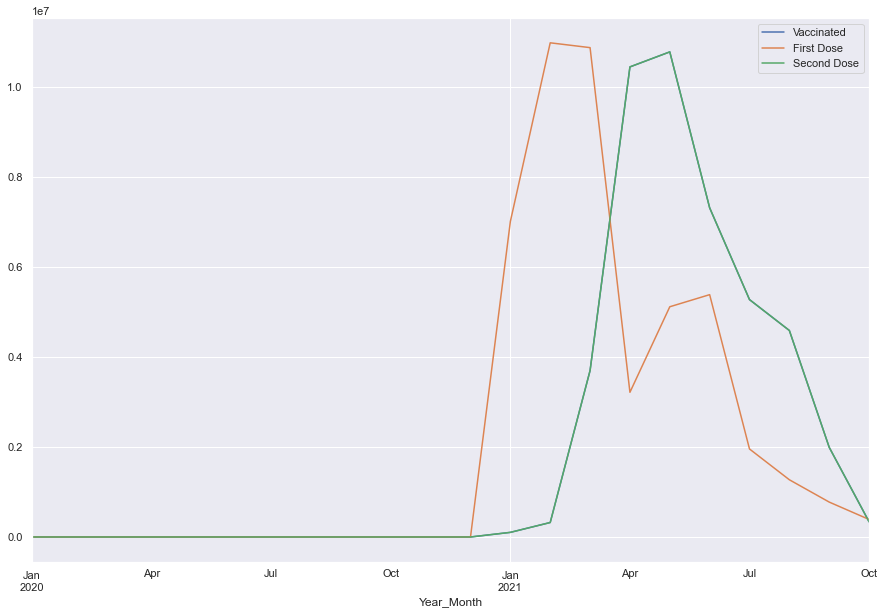

In [65]:
vac_uk_month.plot.line()

**Observations:** Government did not roll out vaccination program until january 2022.

#### 2.2) Presentation expectations:
Use the process of exploring the data for Gibraltar as example to provide a brief description of the various phases to help your team to understand the process. Keep it high level and make sure to focus on both specifics relating to the case (first dose, second dose per region, total and over time) and brief observations regarding the process. Assignment two considers basic data exploration.
- Can we make decisions based on total numbers only, or do trends over time offer additional insights?
- Why it is important to explore the data, what are the typical mistakes made in this phase?

Trends over time offers additional insights as it is important to understand the pattern of the data. Some data are cumulative and some are daily, therefore, plotting the data in line chart to explore over time will provide a more accurate interpretation of the data before drawing conclusions.

In the initial phase, data should be explore from multiple perspectives to provide an objective understanding. Using two different categorical data including province and date to aggregate data. Then, explore from a high level overview using time series with visualisations such as line plot and bar plot to compare the differences of variables between provinces. From this, the variables can be determined as either cumulative or daily as the approach to aggregate the data would be different to calculate total. ie. sum() for daily variables and max() for cumulative variables.

### 3) Assignment activity 3: [Merge and analyse the data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-3-merge-and-analyse-the-data?module_item_id=20649)

#### 3.1) Report expectations:
- Merge and explore the data
- Convert the data type of the Date column from object to datetime
- Create a dataset that meets the expected parameters
- Add calculated features to dataframes (difference between first and second dose vaccinations)
- Filter and sort output
- Observe totals and percentages as a total and over time
- Note observations

Merge the DataFrames without duplicating columns. The new DataFrame (e.g. `covid`) will have `7584` rows and the following columns: Province/State, Country/Region, Date, Vaccinated, First Dose, Second Dose, Deaths, Cases, Recovered, Hospitalised.

In [66]:
cov_uk_clean.columns

Index(['Province/State', 'Country/Region', 'Date', 'Year_Month', 'Deaths',
       'Cases', 'Recovered', 'Hospitalised'],
      dtype='object')

In [67]:
# Create covid cases DataFrame of Others
vac_others = cov_uk_clean[cov_uk_clean['Province/State'] == 'Others']

# make a copy
vac_others_copy = vac_others.copy()

In [68]:
# calculate difference of cases to find daily cases
vac_others_copy['Cases_daily'] = vac_others_copy['Cases'].diff()
vac_others_copy['Deaths_daily'] = vac_others_copy['Deaths'].diff()
vac_others_copy['Recovered_daily'] = vac_others_copy['Recovered'].diff()
vac_others_copy['Hospitalised_daily'] = vac_others_copy['Hospitalised'].diff()

In [69]:
# Fill missing values
vac_others_copy['Cases_daily'].fillna(0, inplace=True)
vac_others_copy['Deaths_daily'].fillna(0, inplace=True)
vac_others_copy['Recovered_daily'].fillna(0, inplace=True)
vac_others_copy['Hospitalised_daily'].fillna(0, inplace=True)

# Check for missing values
vac_others_copy.isna().sum()

Province/State        0
Country/Region        0
Date                  0
Year_Month            0
Deaths                0
Cases                 0
Recovered             0
Hospitalised          0
Cases_daily           0
Deaths_daily          0
Recovered_daily       0
Hospitalised_daily    0
dtype: int64

In [70]:
# plot over time
vac_others_copy.dtypes

Province/State                object
Country/Region                object
Date                  datetime64[ns]
Year_Month                 period[M]
Deaths                         int64
Cases                          int64
Recovered                      int64
Hospitalised                   int64
Cases_daily                  float64
Deaths_daily                 float64
Recovered_daily              float64
Hospitalised_daily           float64
dtype: object

In [71]:
vac_others_copy['Cases_daily'] = vac_others_copy['Cases_daily'].astype('int64')
vac_others_copy['Deaths_daily'] = vac_others_copy['Deaths_daily'].astype('int64')
vac_others_copy['Recovered_daily'] = vac_others_copy['Recovered_daily'].astype('int64')
vac_others_copy['Hospitalised_daily'] = vac_others_copy['Hospitalised_daily'].astype('int64')

In [72]:
# plot over time
vac_others_copy.dtypes

Province/State                object
Country/Region                object
Date                  datetime64[ns]
Year_Month                 period[M]
Deaths                         int64
Cases                          int64
Recovered                      int64
Hospitalised                   int64
Cases_daily                    int64
Deaths_daily                   int64
Recovered_daily                int64
Hospitalised_daily             int64
dtype: object

In [73]:
# view DataFrame
vac_others_copy

,Province/State,Country/Region,Date,Year_Month,Deaths,Cases,Recovered,Hospitalised,Cases_daily,Deaths_daily,Recovered_daily,Hospitalised_daily
6952,Others,United Kingdom,2020-01-22,2020-01,0,0,0,0,0,0,0,0
6953,Others,United Kingdom,2020-01-23,2020-01,0,0,0,0,0,0,0,0
6954,Others,United Kingdom,2020-01-24,2020-01,0,0,0,0,0,0,0,0
6955,Others,United Kingdom,2020-01-25,2020-01,0,0,0,0,0,0,0,0
6956,Others,United Kingdom,2020-01-26,2020-01,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,2021-10-10,2021-10,137735,8154306,0,378,33593,38,0,9
7580,Others,United Kingdom,2021-10-11,2021-10,137763,8193769,0,386,39463,28,0,8
7581,Others,United Kingdom,2021-10-12,2021-10,137944,8231437,0,386,37668,181,0,0
7582,Others,United Kingdom,2021-10-13,2021-10,138080,8272883,0,0,41446,136,0,-386


<AxesSubplot:xlabel='Date'>

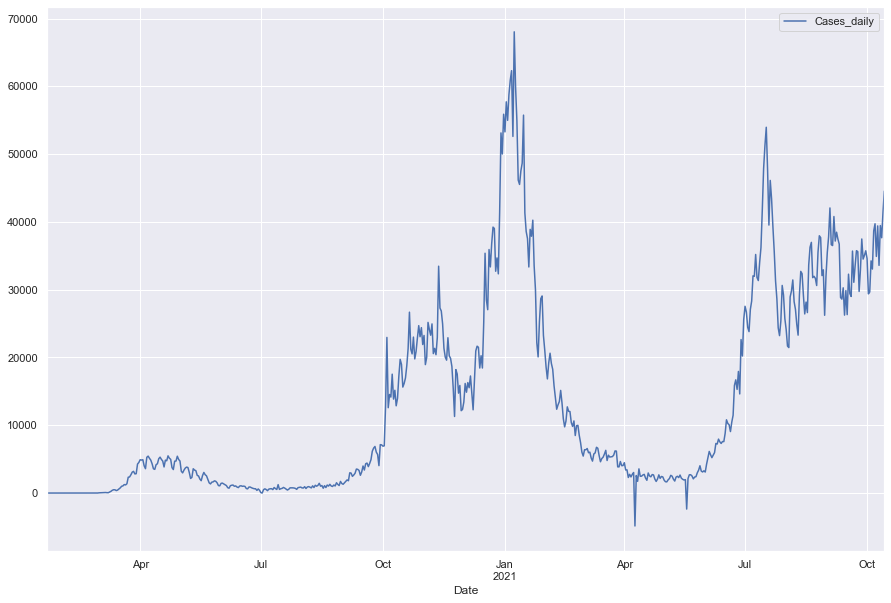

In [74]:
vac_others_copy[['Date','Cases_daily']].plot('Date')

for each day, sum of max of each province = UK total number of 

In [ ]:
# Fill missing values
#cov_uk_clean['Cases_daily'].fillna(0, inplace=True)
#cov_uk_clean['Deaths_daily'].fillna(0, inplace=True)
#cov_uk_clean['Recovered_daily'].fillna(0, inplace=True)
#cov_uk_clean['Hospitalised_daily'].fillna(0, inplace=True)

# Check for missing values
#cov_uk_clean.isna().sum()

In [ ]:
# calculate difference of cases to find daily cases
#cov_uk_clean['Cases_daily'] = cov_uk_clean['Cases'].diff()
#cov_uk_clean['Deaths_daily'] = cov_uk_clean['Deaths'].diff()
#cov_uk_clean['Recovered_daily'] = cov_uk_clean['Recovered'].diff()
#cov_uk_clean['Hospitalised_daily'] = cov_uk_clean['Hospitalised'].diff()

In [ ]:
# Fill missing values
#cov_uk_clean['Cases_daily'].fillna(0, inplace=True)
#cov_uk_clean['Deaths_daily'].fillna(0, inplace=True)
#cov_uk_clean['Recovered_daily'].fillna(0, inplace=True)
#cov_uk_clean['Hospitalised_daily'].fillna(0, inplace=True)

# Check for missing values
#cov_uk_clean.isna().sum()

In [ ]:
# view DataFrame
#cov_uk_clean.sort_values(by='Cases_daily', ascending=False)

In [ ]:
#cov_uk_clean.groupby('Date')[['Cases_daily']].sum()

In [ ]:
# calculate difference of Deaths to find daily cases
#cov_uk_clean['Deaths_daily'] = cov_uk_clean['Deaths'].diff()

# view DataFrame
#cov_uk_clean.plot('Date', 'Deaths_daily', label='Deaths_daily')

In [ ]:
# calculate difference of Recovered to find daily cases
#cov_uk_clean['Recovered_daily'] = cov_uk_clean['Recovered'].diff()

# view DataFrame
#cov_uk_clean['Recovered_daily'].plot()

In [ ]:
# calculate difference of Recovered to find daily cases
#cov_uk_recal['Recovered_daily'] = cov_uk_recal['Recovered'].diff()

# view DataFrame
#cov_uk_recal['Recovered_daily'].plot()

In [ ]:
# calculate difference of Hospitalised to find daily cases
#cov_uk_recal['Hospitalised_daily'] = cov_uk_recal['Hospitalised'].diff()

# view DataFrame
#cov_uk_recal['Hospitalised_daily'].plot()

In [ ]:
# Reset index
#cov_uk_recal = cov_uk_recal.reset_index()

# Fill missing values
#cov_uk_recal.fillna(0, inplace=True)

# Check for missing values
#cov_uk_recal.isna().sum()

In [76]:
# Join the DataFrames as covid where you merge cov and vac 
# Merge on date and province/state
covid_uk = cov_uk_clean.merge(vac_uk_clean, on=['Date','Province/State'], how='inner')

# Clean up / drop unnecessary columns 
covid_uk.drop(list(covid_uk.filter(regex='_y$')), axis=1, inplace=True)

print(f'\nShape of data {covid_uk.shape}\n')


Shape of data (7584, 11)



In [99]:
# view DataFrame
covid_uk[covid_uk['Province/State']== 'British Virgin Islands']

,Province/State,Country/Region,Date,Year_Month_x,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
1264,British Virgin Islands,United Kingdom,2020-01-22,2020-01,0,0,0,0,0,0,0
1265,British Virgin Islands,United Kingdom,2020-01-23,2020-01,0,0,0,0,0,0,0
1266,British Virgin Islands,United Kingdom,2020-01-24,2020-01,0,0,0,0,0,0,0
1267,British Virgin Islands,United Kingdom,2020-01-25,2020-01,0,0,0,0,0,0,0
1268,British Virgin Islands,United Kingdom,2020-01-26,2020-01,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1891,British Virgin Islands,United Kingdom,2021-10-10,2021-10,37,2725,0,755,2140,2432,2140
1892,British Virgin Islands,United Kingdom,2021-10-11,2021-10,37,2725,0,771,2600,3209,2600
1893,British Virgin Islands,United Kingdom,2021-10-12,2021-10,37,2725,0,771,2964,4053,2964
1894,British Virgin Islands,United Kingdom,2021-10-13,2021-10,37,2725,0,0,0,0,0


In [78]:
# Explore the new DataFrame

In [79]:
# info of new DataFrame
# datatype of date is already fixed as DateTime
covid_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7584 entries, 0 to 7583
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  7584 non-null   object        
 1   Country/Region  7584 non-null   object        
 2   Date            7584 non-null   datetime64[ns]
 3   Year_Month_x    7584 non-null   period[M]     
 4   Deaths          7584 non-null   int64         
 5   Cases           7584 non-null   int64         
 6   Recovered       7584 non-null   int64         
 7   Hospitalised    7584 non-null   int64         
 8   Vaccinated      7584 non-null   int64         
 9   First Dose      7584 non-null   int64         
 10  Second Dose     7584 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(2), period[M](1)
memory usage: 711.0+ KB


In [80]:
# descriptive statistics of new DataFrame
covid_uk.describe().round()

,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
count,7584.0,7584.0,7584.0,7584.0,7584.0,7584.0,7584.0
mean,6209.0,214652.0,455.0,685.0,5914.0,6193.0,5914.0
std,24858.0,1007430.0,1011.0,819.0,10846.0,11440.0,10846.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,12.0,0.0,105.0,0.0,0.0,0.0
50%,1.0,168.0,13.0,390.0,0.0,0.0,0.0
75%,25.0,1585.0,312.0,955.0,8338.0,7506.0,8338.0
max,138237.0,8317439.0,8322.0,4907.0,69619.0,94038.0,69619.0


Datatype of date column is fixed as in section 1.

In [81]:
# Groupby and calculate difference between first and second dose
# First Dose Only = First Dose - Second Dose

In [109]:
# Calculate first dose only column
covid_uk['First Dose Only'] = covid_uk['First Dose'] - covid_uk['Second Dose']
covid_uk

,Province/State,Country/Region,Date,Year_Month_x,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose,First Dose Only
0,Anguilla,United Kingdom,2020-01-22,2020-01,0,0,0,0,0,0,0,0
1,Anguilla,United Kingdom,2020-01-23,2020-01,0,0,0,0,0,0,0,0
2,Anguilla,United Kingdom,2020-01-24,2020-01,0,0,0,0,0,0,0,0
3,Anguilla,United Kingdom,2020-01-25,2020-01,0,0,0,0,0,0,0,0
4,Anguilla,United Kingdom,2020-01-26,2020-01,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,2021-10-10,2021-10,137735,8154306,0,378,1070,1216,1070,146
7580,Others,United Kingdom,2021-10-11,2021-10,137763,8193769,0,386,1300,1604,1300,304
7581,Others,United Kingdom,2021-10-12,2021-10,137944,8231437,0,386,1482,2027,1482,545
7582,Others,United Kingdom,2021-10-13,2021-10,138080,8272883,0,0,0,0,0,0


In [108]:
# Number of individuals who received first dose only
covid_uk_province = covid_uk.groupby('Province/State')[['Vaccinated','First Dose', 'Second Dose', 'First Dose Only']].sum()
covid_uk_province.sort_values(by='First Dose Only', ascending=False)

,Vaccinated,First Dose,Second Dose,First Dose Only
Province/State,,,,
Gibraltar,5606041,5870786,5606041,264745
Montserrat,5157560,5401128,5157560,243568
British Virgin Islands,4933315,5166303,4933315,232988
Anguilla,4709072,4931470,4709072,222398
Isle of Man,4036345,4226984,4036345,190639
Falkland Islands (Malvinas),3587869,3757307,3587869,169438
Cayman Islands,3363624,3522476,3363624,158852
Channel Islands,3139385,3287646,3139385,148261
Turks and Caicos Islands,2915136,3052822,2915136,137686


In [110]:
# Percentage of individuals who received first dose only
covid_uk_province['First Dose Only %'] = covid_uk_province['First Dose Only']/covid_uk_province['Second Dose']*100
covid_uk_province.sort_values(by='First Dose Only %', ascending=False)

,Vaccinated,First Dose,Second Dose,First Dose Only,First Dose Only %
Province/State,,,,,
Turks and Caicos Islands,2915136,3052822,2915136,137686,4.723142
Isle of Man,4036345,4226984,4036345,190639,4.723060
Anguilla,4709072,4931470,4709072,222398,4.722756
British Virgin Islands,4933315,5166303,4933315,232988,4.722747
Cayman Islands,3363624,3522476,3363624,158852,4.722644
Channel Islands,3139385,3287646,3139385,148261,4.722613
Montserrat,5157560,5401128,5157560,243568,4.722543
Falkland Islands (Malvinas),3587869,3757307,3587869,169438,4.722525
Gibraltar,5606041,5870786,5606041,264745,4.722495


Gibraltar is the province with the highest number of individuals who have recevied a first dose but not second dose. However, in terms of percentage, all province has similar percentage of Second Dose population who are eligible to receive second dose which is 4.7%.

In [140]:
# Groupby and calculate difference between first and second dose over time
# Specific region Gibraltar will be used to view changes over time

In [133]:
# Number of individuals with first dose only over time
Gibraltar_first_only = covid_uk[covid_uk['Province/State']=='Gibraltar']

Gibraltar_first_only.sort_values(by='First Dose Only', ascending=True)

,Province/State,Country/Region,Date,Year_Month_x,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose,First Dose Only
4250,Gibraltar,United Kingdom,2021-04-24,2021-04,94,4283,4183,209,68454,18596,68454,-49858
4255,Gibraltar,United Kingdom,2021-04-29,2021-04,94,4283,4185,183,61446,15321,61446,-46125
4236,Gibraltar,United Kingdom,2021-04-10,2021-04,94,4277,4180,331,59404,13889,59404,-45515
4242,Gibraltar,United Kingdom,2021-04-16,2021-04,94,4291,4181,268,62458,16945,62458,-45513
4243,Gibraltar,United Kingdom,2021-04-17,2021-04,94,4291,4181,254,62454,17431,62454,-45023
...,...,...,...,...,...,...,...,...,...,...,...,...
4180,Gibraltar,United Kingdom,2021-02-13,2021-02,84,4215,4054,2621,356,63170,356,62814
4179,Gibraltar,United Kingdom,2021-02-12,2021-02,84,4212,4032,2790,597,68075,597,67478
4173,Gibraltar,United Kingdom,2021-02-06,2021-02,80,4177,3923,3364,208,68726,208,68518
4166,Gibraltar,United Kingdom,2021-01-30,2021-01,75,4108,3666,4127,1328,74799,1328,73471


In [134]:
Gibraltar_first_only.columns

Index(['Province/State', 'Country/Region', 'Date', 'Year_Month_x', 'Deaths',
       'Cases', 'Recovered', 'Hospitalised', 'Vaccinated', 'First Dose',
       'Second Dose', 'First Dose Only'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

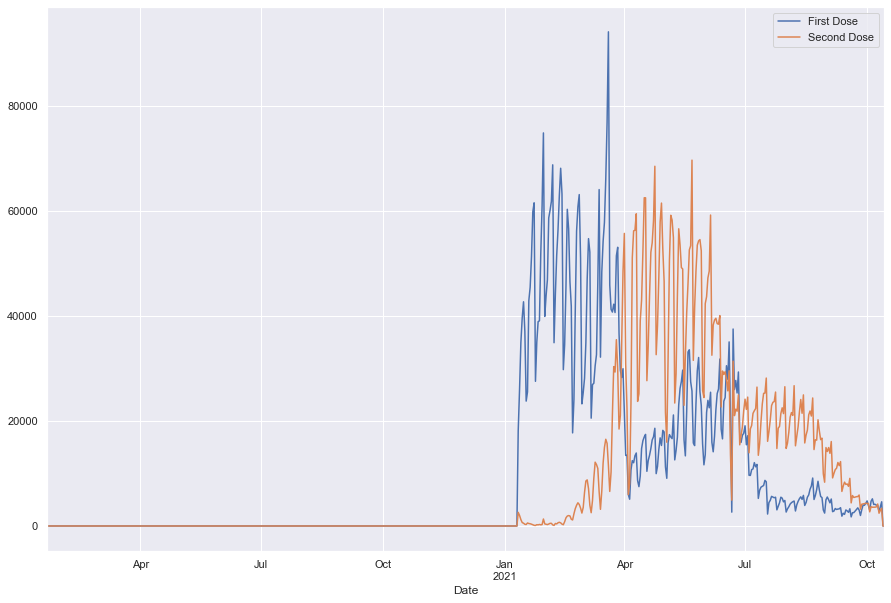

In [147]:
# line plot of first and second dose
Gibraltar_first_only[['Date', 'Year_Month_x', 'First Dose', 'Second Dose']].plot('Date')

Beginning in April, first dose numbers became lower than second dose numbers. Since the definition of fully vaccinated is receiving first and second dose, excluding boosters, the numbers may have dropped because some have received the booster jab ie. third dose.

First dose and second dose numbers are daily. Since majority of the population has already has the first dose, that may explain the behavior of a significant drop in number of daily first dose. This lead to the pattern that the daily number of second dose is higher than that of first dose beginning in April because majority of the population are encouraged to received the second dose.
Efforts of government rolling out second dose began in April onwards.

Therefore, when calculating the first dose only, there is a negative behaviour in April because the number of second dose is greater than number of first dose.

No record on dates 2021-10-13 and 2021-10-14.

<AxesSubplot:xlabel='Date'>

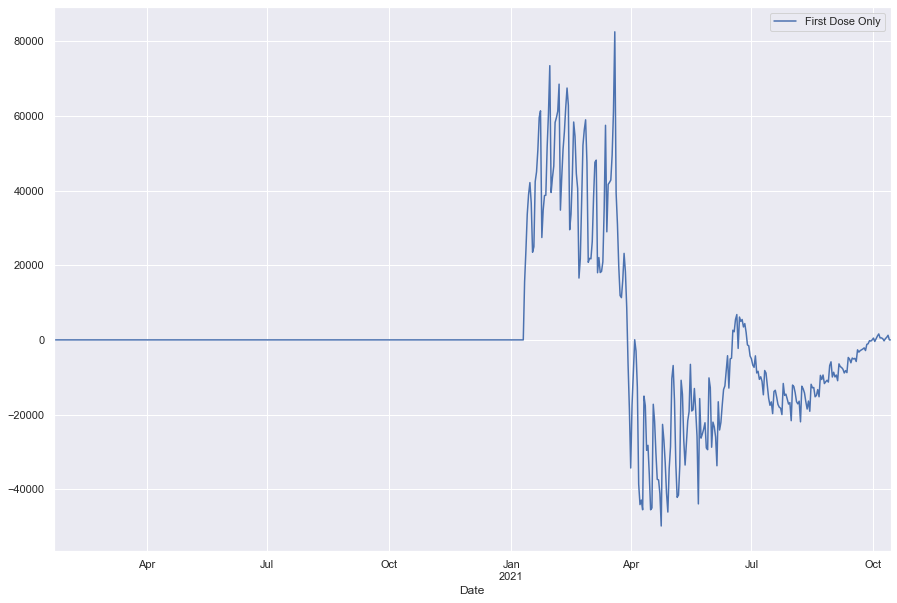

In [128]:
Gibraltar_first_only.plot('Date', 'First Dose Only')

<AxesSubplot:xlabel='Date'>

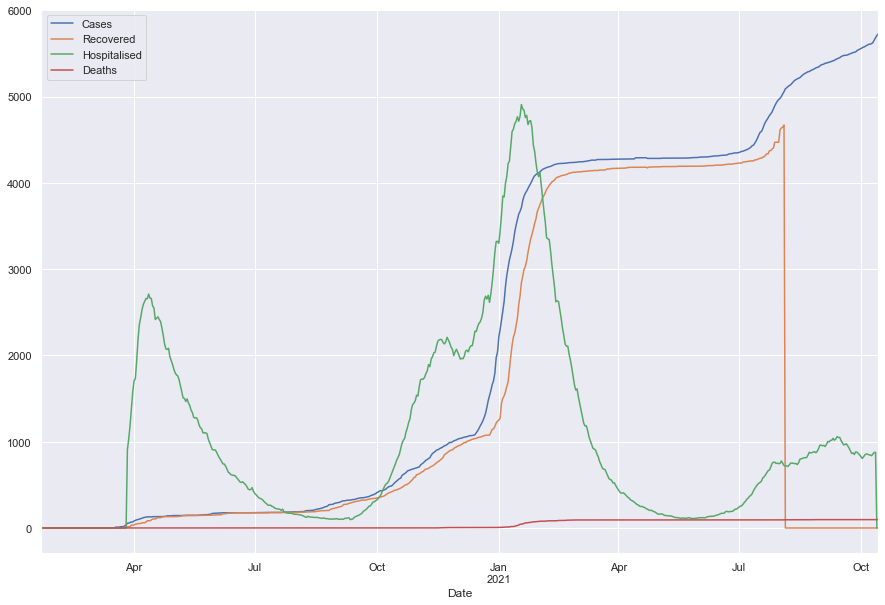

In [151]:
# Gibraltar cases trend
Gibraltar_first_only[['Date','Cases','Recovered','Hospitalised','Deaths']].plot('Date')

Moreover, there is a significant jump in cumulative cases in Jan, which is when the goverenment began to rollout vaccination program. It is then, the recovered rates was also increasing at a similar rate of cases. Number of people hospitalised also decreased significantly after vaccination program rolled out in Jan. 

Death rates stablised after covid reached it's peak in January.

<AxesSubplot:xlabel='Date'>

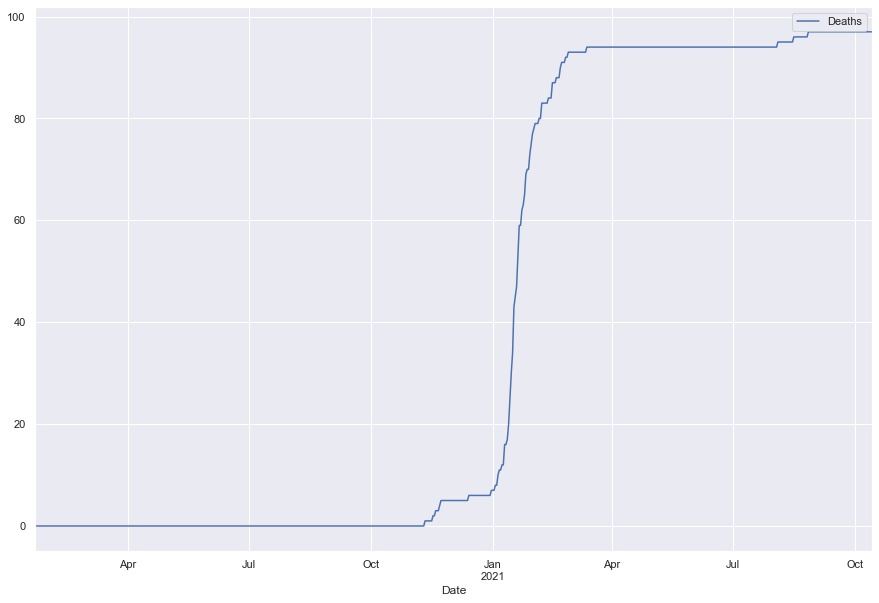

In [152]:
# Gibraltar cases trend
Gibraltar_first_only[['Date','Deaths']].plot('Date')

In [144]:
# Number of individuals with first dose only over time
Montserrat_first_only = covid_uk[covid_uk['Province/State']=='Montserrat']

Montserrat_first_only.sort_values(by='First Dose Only', ascending=True)

,Province/State,Country/Region,Date,Year_Month_x,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose,First Dose Only
5514,Montserrat,United Kingdom,2021-04-24,2021-04,1,20,19,192,62978,17108,62978,-45870
5519,Montserrat,United Kingdom,2021-04-29,2021-04,1,20,19,168,56530,14095,56530,-42435
5500,Montserrat,United Kingdom,2021-04-10,2021-04,1,20,19,305,54651,12778,54651,-41873
5506,Montserrat,United Kingdom,2021-04-16,2021-04,1,20,19,246,57461,15589,57461,-41872
5507,Montserrat,United Kingdom,2021-04-17,2021-04,1,20,19,234,57458,16036,57458,-41422
...,...,...,...,...,...,...,...,...,...,...,...,...
5444,Montserrat,United Kingdom,2021-02-13,2021-02,1,19,13,2412,327,58117,327,57790
5443,Montserrat,United Kingdom,2021-02-12,2021-02,1,19,13,2567,549,62629,549,62080
5437,Montserrat,United Kingdom,2021-02-06,2021-02,1,15,13,3095,191,63228,191,63037
5430,Montserrat,United Kingdom,2021-01-30,2021-01,1,13,12,3797,1221,68815,1221,67594


<AxesSubplot:xlabel='Date'>

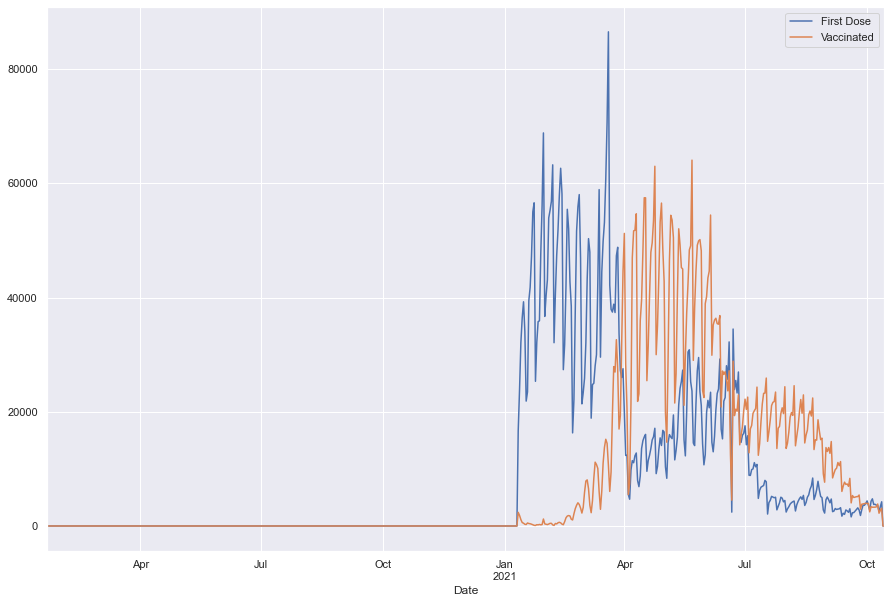

In [146]:
# line plot of first and second dose
Montserrat_first_only[['Date', 'Year_Month_x', 'First Dose', 'Vaccinated']].plot('Date')

<AxesSubplot:xlabel='Date'>

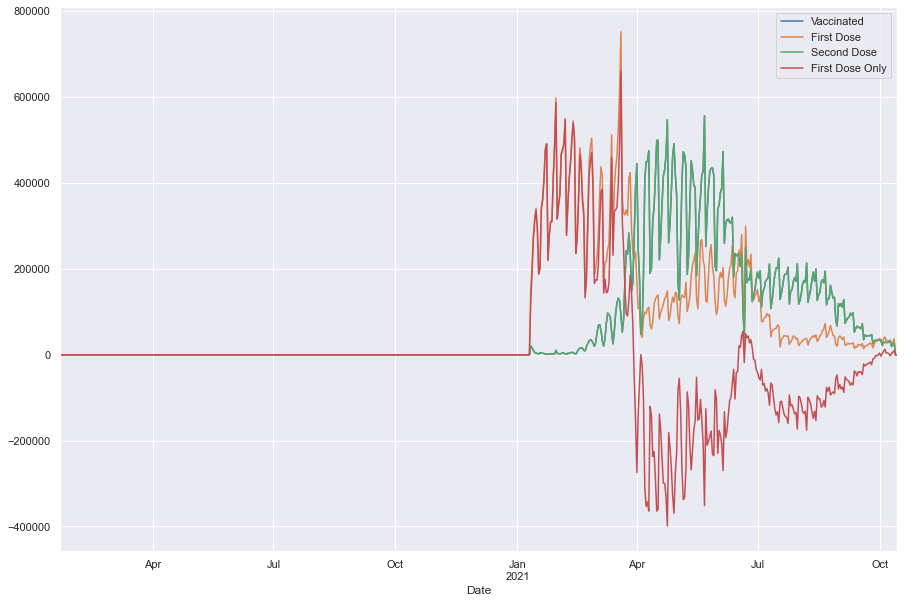

In [112]:
# plot first dose only over time
first_only_date.plot()

those who received first dose cannot be lower than number of second dose because those who received a second dose must have had the first dose first?

#### 3.2) Presentation expectations:
We use similar calculations and representations as we had in activity 2, but now expand to look at all provinces. Assignment 3 is concerned with exploring data in the context of a specific business question (as opposed to general exploration in assignment 2).
- What insights can be gained from the data? (Description of all regions, assumptions and concerns, trends or patterns you have observed.)
- Are there limitations or assumptions that needs to be considered?
- Make sure to provide a brief overview of the data and typical considerations at this phase of analysis

### 4) Assignment activity 4: [Visualise and identify initial trends](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-4-visualise-and-identify-initial-trends?module_item_id=21381)

The government is looking to promote second dose vaccinations and looking for the first area to test a new campaign. They are looking for the highest number of people who have received a first dose and not a second dose. 
- Where should they target?
- Which provinces have the highest number (actual numbers) and highest relative numbers (second dose only/first dose)
- Visualise both outputs.

#### 4.1) Report expectations:
- Consider additional features (deaths and recoveries)
- Visualise the data
- Note observations
 - Do deaths follow the same patterns observed in vaccination data (daily vs cumulative)?
 - Do we need to separate groups of data for specific variables and analyse them in isolation (Others) to be able to observe the patterns?

#### 4.2) Presentation expectations:
- What insights can be gained from the data?
- Why do we need to consider other features?
- **Note**: Different features evaluated to improve decision making (deaths and recoveries); why it is important to explore data and use different views; Highlight two or three suggestions to get junior team members started in terms of good practices

In [141]:
# Absolute numbers

In [ ]:
covid_uk_province

In [142]:
# Relative numbers (%)

In [143]:
# Sort and display

In [144]:
# Visualise

In [145]:
# Let's smooth out the data by looking at monthly figures

In [146]:
# Other features evaluated (data preparation, output and plots)

***Notes and observations:***
Your observations here. (Double click to edit)

***Examples could include:***
- Are there other trends in terms of recoveries or hospitalisations compared to other features that you found interesting and that may add value in terms of the decision making process?
- Any other observations regarding the data?
- Any suggestions for improvements and further analysis?
- What would your future data requirements be?

### 5) Assignment activity 5: External data: [Analyse the Twitter data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-5-analyse-the-twitter-data?module_item_id=21383)
In the next section, you were supplied with a sample file and the question was asked to determine whether there are additional #tags or keywords that could potentially provide insights into your covid analysis. While the sample set is limited, you were asked to review the provided file and demonstrate the typical steps and make recommendations regarding future use of similar datasets to provide richer insights.

#### 5.1) Report expectations:
- Demonstrate basic ability to work with Twitter data
- Search for hash-tags or keywords
- Create dataframes and visualisations
- Note observations

In [147]:
# Import the tweet dataset (`tweets_2.csv`)


In [148]:
# Explore the data: info(), head()


In [149]:
# Explore the structure, count the tweets, get the elements of interest


In [150]:
# Create a dataframe with the text only


In [151]:
# Loop through the messages and build a list of values containing the #-symbol


In [152]:
# Filter and sort


In [153]:
# Plot


#### 5.2) Presentation expectations:
Discuss whether external data could potentially be used and whether it is a viable solution to pursue. Discuss your assumptions and suggestions. 

Points to consider:
- What insights can be gained from the data?
- What are the advantages and disadvantages of using external data?
- How would you suggest using external data in the project?

### 6) Assignment activity 6: [Perform time-series analysis](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-6-perform-time-series-analysis?module_item_id=22584)

#### 6.1) Report expectations:
- Demonstrate using external function and interpret results
- Note observations

In [154]:
# You can copy and paste the relevant code cells from the provided template here.

#### 6.2) Presentation expectations:
- **Question 1**: We have heard of both qualitative and quantitative data from the previous consultant. What are the differences between the two? Should we use only one or both of these types of data and why? How can these be used in business predictions? Could you provide examples of each?
- **Question 2**: We have also heard a bit about the need for continuous improvement. Why should this be implemented, it seems like a waste of time. Why can’t we just implement the current project as it stands and move on to other pressing matters?
- **Question 3**: As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. We have covered everything from a data ethics standpoint, correct? There’s nothing else we need to implement from a data ethics perspective, right?